In [1]:
#https://pypi.python.org/pypi/libarchive
!pip install -U scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

     |████████████████████████████████| 993 kB 5.4 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=521d0b8890d1e34aa30fe70183c26ba827b2d8c7cca22b62fbb41729cc83da56
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
# The universe of variables and membership functions 
velocity = ctrl.Antecedent(np.arange(0, 360.5, 0.5), 'velocity') 
distance = ctrl.Antecedent(np.arange(0, 70.5, 0.5), 'distance')
brake = ctrl.Consequent(np.arange(0, 85.5, 0.5), 'brake')

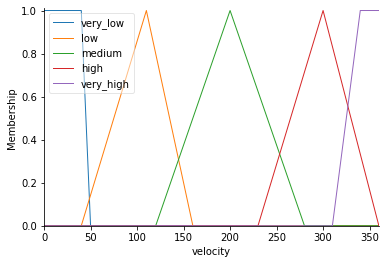

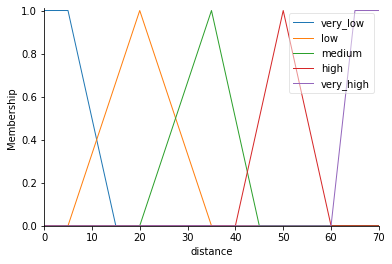

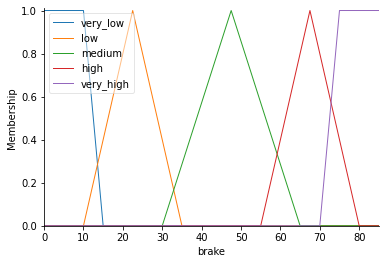

In [12]:
velocity['very_low'] = fuzz.trapmf(velocity.universe,[0,0,40,50])
velocity['low'] = fuzz.trimf(velocity.universe,[40,110,160])
velocity['medium'] = fuzz.trimf(velocity.universe,[120,200,280])
velocity['high'] = fuzz.trimf(velocity.universe,[230,300,360])
velocity['very_high'] = fuzz.trapmf(velocity.universe,[310,340,360,360])

distance['very_low'] = fuzz.trapmf(distance.universe,[0,0,5,15])
distance['low'] = fuzz.trimf(distance.universe,[5,20,35])
distance['medium'] = fuzz.trimf(distance.universe,[20,35,45])
distance['high'] = fuzz.trimf(distance.universe,[40,50,60])
distance['very_high'] = fuzz.trapmf(distance.universe,[60,65,70,70])

brake['very_low'] = fuzz.trapmf(brake.universe,[0,0,10,15])
brake['low'] = fuzz.trimf(brake.universe,[10,22.5,35])
brake['medium'] = fuzz.trimf(brake.universe,[30,47.5,65])
brake['high'] = fuzz.trimf(brake.universe,[55,67.5,80])
brake['very_high'] = fuzz.trapmf(brake.universe,[70,75,85,85])

velocity.view()
distance.view()
brake.view()

In [4]:
rule1 = ctrl.Rule(velocity['very_low']&distance['very_low'],brake['medium'])
rule2 = ctrl.Rule(velocity['very_low']&distance['low'],brake['low'])
rule3 = ctrl.Rule(velocity['very_low']&distance['medium'],brake['low'])
rule4 = ctrl.Rule(velocity['very_low']&distance['high'],brake['very_low'])
rule5 = ctrl.Rule(velocity['very_low']&distance['very_high'],brake['very_low'])

rule6 = ctrl.Rule(velocity['low']&distance['very_low'],brake['high'])
rule7 = ctrl.Rule(velocity['low']&distance['low'],brake['medium'])
rule8 = ctrl.Rule(velocity['low']&distance['medium'],brake['low'])
rule9 = ctrl.Rule(velocity['low']&distance['high'],brake['very_low'])
rule10 = ctrl.Rule(velocity['low']&distance['very_high'],brake['very_low'])

rule11 = ctrl.Rule(velocity['medium']&distance['very_low'],brake['very_high'])
rule12 = ctrl.Rule(velocity['medium']&distance['low'],brake['high'])
rule13 = ctrl.Rule(velocity['medium']&distance['medium'],brake['medium'])
rule14 = ctrl.Rule(velocity['medium']&distance['high'],brake['low'])
rule15 = ctrl.Rule(velocity['medium']&distance['very_high'],brake['very_low'])

rule16 = ctrl.Rule(velocity['high']&distance['very_low'],brake['very_high'])
rule17 = ctrl.Rule(velocity['high']&distance['low'],brake['high'])
rule18 = ctrl.Rule(velocity['high']&distance['medium'],brake['high'])
rule19 = ctrl.Rule(velocity['high']&distance['high'],brake['medium'])
rule20 = ctrl.Rule(velocity['high']&distance['very_high'],brake['low'])

rule21 = ctrl.Rule(velocity['very_high']&distance['very_low'],brake['very_high'])
rule22 = ctrl.Rule(velocity['very_high']&distance['low'],brake['very_high'])
rule23 = ctrl.Rule(velocity['very_high']&distance['medium'],brake['high'])
rule24 = ctrl.Rule(velocity['very_high']&distance['high'],brake['medium'])
rule25 = ctrl.Rule(velocity['very_high']&distance['very_high'],brake['low'])

In [5]:
brake_ctrl = ctrl.ControlSystem(
    [rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])

16.630002143228936


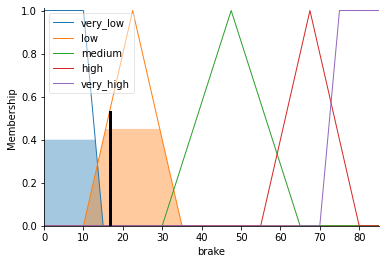

In [6]:
braking = ctrl.ControlSystemSimulation(brake_ctrl)
braking.input['velocity'] = 32
braking.input['distance'] = 56

braking.compute()
print(braking.output['brake'])

brake.view(sim=braking)
plt.show()